In [1]:
import numpy as np
import pandas as pd
from tensorly.decomposition import  partial_tucker,parafac2
import tensorly as tl
from scipy.stats.mstats import gmean
from tensorly.parafac2_tensor import parafac2_to_slice, apply_parafac2_projections
from tensorly.metrics.regression import variance as tl_var
from pybiomart import Server
from tfac.Data_Mod import form_parafac2_tensor, ohsu_var, form_tensor
from tfac.tensor import partial_tucker_decomp, find_R2X_partialtucker, flip_factors
import collections
from tfac.figures.figureCommon import subplotLabel, getSetup
import seaborn as sns
tl.set_backend("numpy")

In [2]:
def R2X_Figure_PartialTucker(ax, input_tensor):
    '''Create Partial Tucker R2X Figure'''
    R2X = np.zeros(13)
    for i in range(1, 13):
        output = partial_tucker_decomp(input_tensor, [2], i)
        R2X[i] = find_R2X_partialtucker(output, input_tensor)
    sns.scatterplot(np.arange(len(R2X)), R2X, ax=ax)
    ax.set_xlabel("Rank Decomposition")
    ax.set_ylabel("R2X")
    ax.set_title("Partial Tucker Decomposition")
    ax.set_yticks([0, .2, .4, .6, .8, 1])

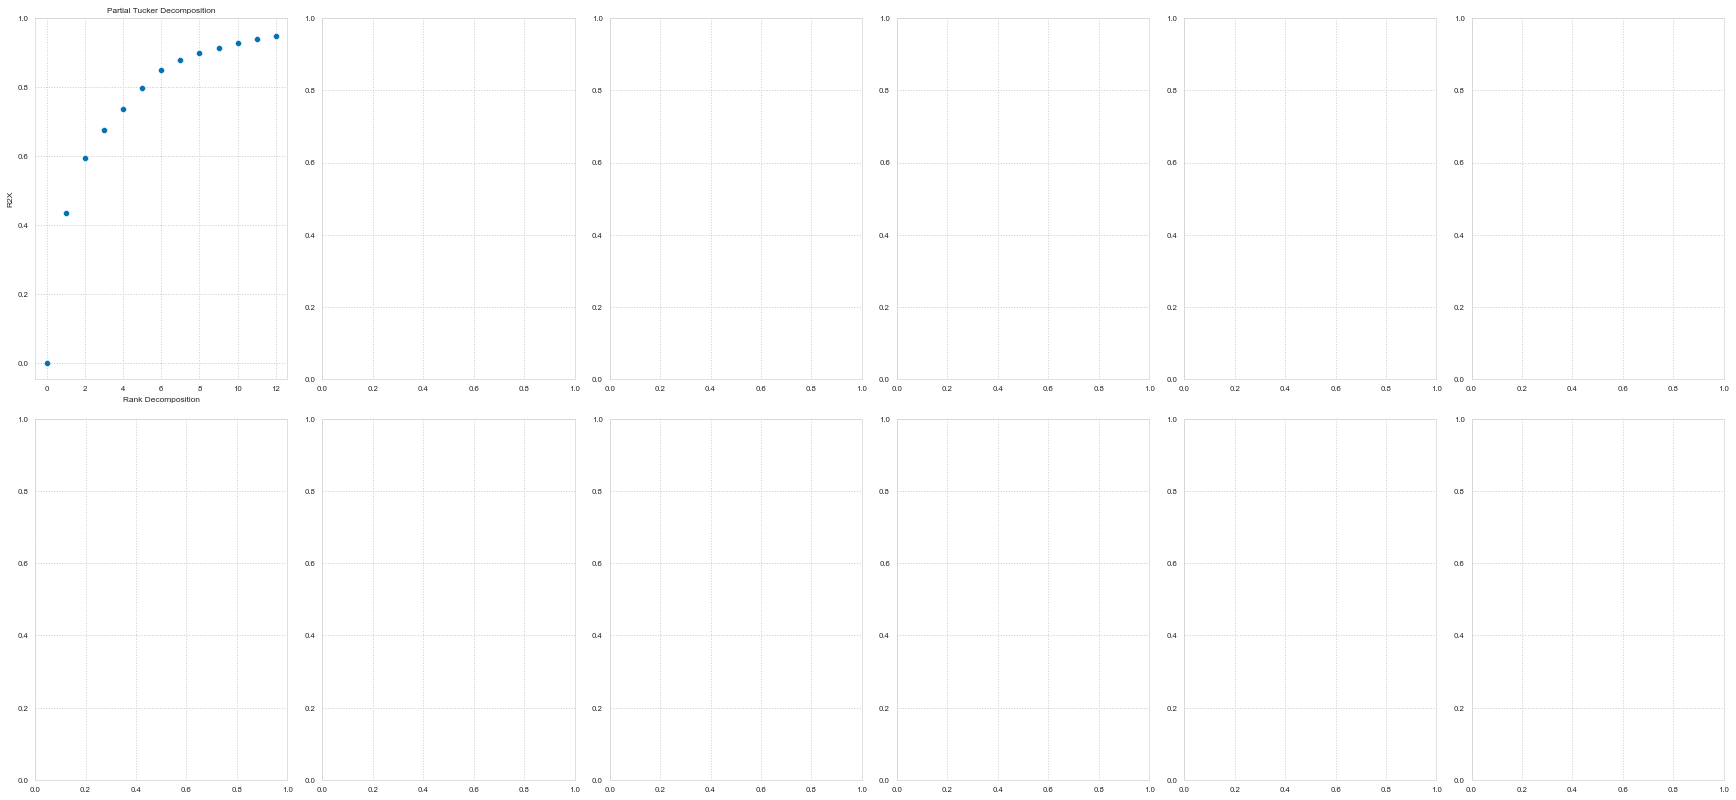

In [3]:
component = 5
tensor, treatment_list, times = form_tensor()
pre_flip_result = partial_tucker_decomp(tensor, [2], component)

result = flip_factors(pre_flip_result)


In [114]:
geneexpression = pd.read_csv("tfac/data/ohsu/MDD_RNAseq_Level4.csv")
ids = geneexpression["ensembl_gene_id"]
geneexpression.drop("ensembl_gene_id", inplace = True, axis = 1)

In [115]:
toflatten = result[0]
flattened = []

for treatment in range(7):
    flattened.append(pd.DataFrame(toflatten[treatment]).T)

In [116]:
df = pd.concat(flattened, axis=1)

In [117]:
cols = [str(x) + "_" + str(y) for x in treatment_list for y in times[-2:]]

In [118]:
ctrl = df.iloc[:, 0]

In [119]:
df.drop([0,1,2,3], inplace = True, axis = 1)

In [120]:
ctrl = pd.DataFrame(ctrl)
df = pd.concat([ctrl,df], axis = 1)

In [121]:
cols = ["ctrl_0"] + cols
df.columns = cols

In [122]:
df = df.reindex(sorted(df.columns), axis=1)
geneexpression = geneexpression.reindex(sorted(geneexpression.columns), axis=1)

In [123]:
df

,BMP2_24,BMP2_48,EGF_24,EGF_48,HGF_24,HGF_48,IFNg_24,IFNg_48,OSM_24,OSM_48,PBS_24,PBS_48,TGFb_24,TGFb_48,ctrl_0
0,1.071076,1.069398,2.050212,1.476656,-1.537141,-3.903652,1.791233,-3.557445,0.203868,-4.844864,-8.506872,-10.706939,2.517261,2.808549,-0.458332
1,1.209040,2.072962,0.668022,1.872338,1.041496,2.491397,2.776940,4.063775,2.309526,3.892356,0.325359,-0.988813,1.033223,2.583797,-2.090065
2,1.162957,1.306034,-0.396897,-1.350430,-0.507012,-0.180587,-0.922847,-0.875731,-1.819324,-1.518834,1.437439,2.620989,3.901608,3.681004,-0.109557
3,-0.715121,-1.214321,-0.571846,-0.965389,-1.016182,-1.215399,3.229771,2.960070,-0.736957,-1.703332,-0.131099,1.522144,-0.138746,-1.049219,0.142770
4,-0.143056,-1.183371,-0.838146,-1.891454,-0.906297,-1.081466,-0.279063,-1.843729,2.602702,2.988601,-0.385453,1.085603,1.090341,-0.134028,0.057405


In [124]:
geneexpression.head()

,BMP2_24,BMP2_48,EGF_24,EGF_48,HGF_24,HGF_48,IFNg_24,IFNg_48,OSM_24,OSM_48,PBS_24,PBS_48,TGFb_24,TGFb_48,ctrl_0
0,3.480283,3.408841,3.636781,3.798476,3.613557,3.490350,3.481069,3.293659,3.961705,3.954293,3.262744,2.947237,3.620211,3.910465,3.641679
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5.240852,5.144961,5.289134,5.202244,5.121996,4.999648,5.245947,5.085280,5.234676,4.905824,4.600587,4.669564,5.211743,5.110060,5.194641
3,2.255796,2.347308,2.325305,2.398497,2.376863,2.522765,3.426621,3.892147,2.697692,2.854585,2.738067,2.661012,2.219436,2.219483,2.344049
4,3.632430,3.530848,4.137749,3.881735,3.567277,2.728355,4.139900,2.899378,4.052625,2.888679,1.509635,1.278536,3.448946,3.460701,3.756114


In [125]:
ids

0        ENSG00000000003
1        ENSG00000000005
2        ENSG00000000419
3        ENSG00000000457
4        ENSG00000000460
              ...       
57362    ENSG00000286219
57363    ENSG00000286220
57364    ENSG00000286228
57365    ENSG00000286261
57366    ENSG00000286265
Name: ensembl_gene_id, Length: 57367, dtype: object

In [126]:
cols = df.columns

In [127]:
df = df.to_numpy()
genexpression = geneexpression.to_numpy()

array([[  1.07107602,   1.06939836,   2.05021232,   1.47665647,
         -1.53714089,  -3.90365221,   1.79123316,  -3.55744523,
          0.20386754,  -4.84486442,  -8.50687207, -10.70693875,
          2.51726116,   2.80854894,  -0.45833226],
       [  1.20904013,   2.07296162,   0.66802195,   1.87233788,
          1.04149558,   2.49139655,   2.77694039,   4.06377545,
          2.30952644,   3.89235624,   0.32535911,  -0.98881293,
          1.03322261,   2.58379701,  -2.09006518],
       [  1.16295732,   1.30603446,  -0.39689694,  -1.35043001,
         -0.50701191,  -0.18058718,  -0.92284708,  -0.87573105,
         -1.81932375,  -1.51883396,   1.43743887,   2.62098908,
          3.90160827,   3.68100372,  -0.10955669],
       [ -0.7151206 ,  -1.21432149,  -0.5718463 ,  -0.96538911,
         -1.01618187,  -1.2153992 ,   3.22977118,   2.96006963,
         -0.73695727,  -1.70333192,  -0.13109919,   1.52214408,
         -0.13874582,  -1.0492191 ,   0.14277032],
       [ -0.14305615,  -1.18